# The risk of diabetes increases with age

H0. no difference regardless of age\
H1. difference in the outcome as the age increases

**summary**
- The purpose of bayesian approach for this hypothesis is to confirm the predictive power of ages on diabetes occurance.
- We analyzed our results for the hypothesis using a Bayesian Logistic regression.
- We first divided original dataset with test and train dataset (test prop: train prob == 0.3 : 0.7).
- The probability corresponding to a log-odds value of coefficient on age is 0.5114979725956643, which means that 51% probability on the risk of diabetes as of the increases of age.
  


***dataset***
- For the hypothesis, we use diabetes dataset (n=768). This dataset is originated from National Institute of Diabetes and Digestive and Kidney Diseases, that diagnoses diabetes and other related elements (gluecose). All patients here are females at least 21 years old of Pima Indian heritage.
- We use age data and diabetes diagnosis data in analysis.
  
***Fitting a model (Generate a model)***
  1. We first select an informative prior given from posterior belief resulted from uninformative uniform prior. 
  2. Then parameters of alpha and beta of age follow normal distributions, which is commonly used as default prior.
  3. With the prior belifs obtained from 1) (alpha = μ:-2 σ:1), (beta_ages = μ:0.045 σ:1), we fit model to compute normative posterior distribution.
  4. We evaluate the model with test data set, and it shows F1 score: 0.27 (27%), Recall score is 0.18  (18%), and Precision score is 0.52 (52%) to predict diabetes occurance from ages with the model. This means that the model has poor power to predict diabetes from ages.
  5. ~~I will calculate KL divergence and log KL divergence+ between normative distribution and posterior distribution to situate right priors.~~
     
***Statistical analysis***
  1. ~~We will calculate uncertainty in KLD for each condition by constructing 95% bootstrapped confidence intervals. We will compare the 95% intervals of each method.~~
  2. The probability corresponding to a log-odds value of coefficient on age is 0.5114979725956643, which means that 51% probability on the risk of diabetes as of the increases of age.


In [1]:
## logistic regression
## risk of diabetes (outcome) --> categorical (binominal)
## age --> numeric (1,2,3..)

## Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import stan
import csv

In [3]:
import nest_asyncio #this library is important to use pystan

nest_asyncio.apply()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import scipy.stats as stats

In [6]:
## evaluation model
import scipy
from sklearn.metrics import classification_report

In [7]:
## import data

df = pd.read_csv('../db/diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/ipykernel_43854/3306392025.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age,color='r')


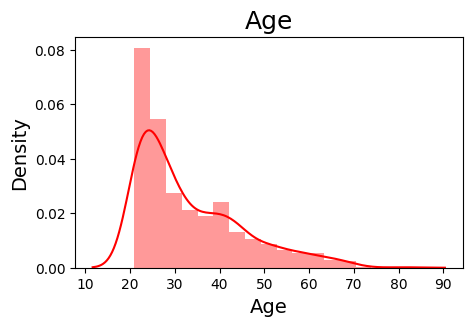

In [10]:
plt.figure(figsize=(5,3))
sns.distplot(df.Age,color='r')
plt.title('Age',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Density',size=14)
plt.show()

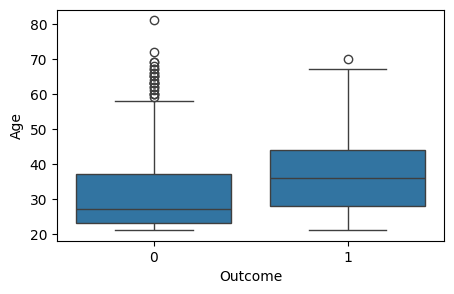

In [11]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3))
sns.boxplot(data=df, ax = ax1, x='Outcome', y='Age')
plt.show()

In [12]:
data = {
"N": len(df), 
"ages": df.loc[:, "Age"].values,
"y": df.loc[:, "DiabetesPedigreeFunction"].values,
}

In [13]:
train, test = train_test_split(df, test_size=0.6)

In [14]:
## load train data

train_data = {
"N": len(train), 
"ages": train.loc[:, "Age"].values,
 "y": train.loc[:, "Outcome"].values,   
}

## Frequentist test

In [15]:
from sklearn.linear_model import LogisticRegression

train_factor = train[['Age']]
train_y = train[['Outcome']]

model = LogisticRegression()
model.fit(train_factor, train_y)

## alpha
print("Intercept (alpha) : ", model.intercept_)
## beta
print("coefficient (beta_ages) : ", model.coef_) 

Intercept (alpha) :  [-2.35047588]
coefficient (beta_ages) :  [[0.04718178]]


/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### uninformative uniform prior

In [16]:
## normal distribution
## default flat prior

stan_prior = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
}


parameters {

//declare parameters that will be estimated
real alpha;
real beta_age;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
p = ages * beta_age + alpha;

}

"""

In [17]:
stan_prior_model = stan.build(stan_prior, data=train_data)

Building: found in cache, done.
Messages from stanc:
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_idvq30jc/model_w6n2z5tm.stan', line 5, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    calculation.
    calculation.


In [18]:
fit_prior = stan_prior_model.fixed_param(num_chains=1, num_samples=1000) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.


In [19]:
## normal distribution
## default flat prior

stan_code = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
}


parameters {

//declare parameters that will be estimated
real alpha;
real beta_age;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
p = ages * beta_age + alpha;

//likelihood
y ~ bernoulli_logit(p);
}

generated quantities {
//predictive posterior check

real y_rep[N];

for(n in 1:N){
y_rep[n] = inv_logit(ages[n] * beta_age + alpha);

}
}
"""

In [20]:
stan_model = stan.build(stan_code, data=train_data)

Building: found in cache, done.
Messages from stanc:
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_u3tr9ohi/model_dofpq7vc.stan', line 5, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_u3tr9ohi/model_dofpq7vc.stan', line 32, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positi

In [21]:
fit = stan_model.sample(num_chains=4, num_samples=1000, num_warmup=500) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   3% (200/6000)
Sampling:  28% (1700/6000)
Sampling:  53% (3200/6000)
Sampling:  78% (4700/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.001687 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.87 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001619 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001637 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.37 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001629 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.29 seconds.
  Adjust your expectations accordingly!


In [22]:
fit.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age,y_rep.1,...,y_rep.298,y_rep.299,y_rep.300,y_rep.301,y_rep.302,y_rep.303,y_rep.304,y_rep.305,y_rep.306,y_rep.307
draws,,,,,,,,,,,,,,,,,,,,,
0,-185.162169,0.891370,0.259117,2.0,3.0,0.0,187.357785,-1.788622,0.029827,0.383137,...,0.328524,0.651883,0.507699,0.411698,0.284214,0.315502,0.272236,0.492786,0.290321,0.348557
1,-183.879546,0.990210,0.244888,4.0,19.0,0.0,184.145494,-2.610818,0.055229,0.454937,...,0.349197,0.865615,0.680953,0.510043,0.267141,0.324530,0.246079,0.656491,0.278092,0.387725
2,-183.877874,1.000000,0.258792,1.0,3.0,0.0,184.896391,-2.068180,0.039068,0.413577,...,0.340349,0.749568,0.578094,0.451918,0.281868,0.323032,0.266325,0.558930,0.289843,0.367133
3,-183.746894,0.939457,0.196452,2.0,3.0,0.0,184.106188,-2.399157,0.050464,0.455434,...,0.358369,0.844018,0.663549,0.505780,0.281770,0.335508,0.261801,0.640659,0.292094,0.393874
4,-185.449821,0.814561,0.259117,1.0,3.0,0.0,186.710821,-1.725865,0.034776,0.451223,...,0.383685,0.748565,0.597596,0.485847,0.327973,0.367377,0.312831,0.580763,0.335683,0.408636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-184.106068,0.999306,0.196452,2.0,7.0,0.0,184.778618,-2.062962,0.037552,0.398755,...,0.329362,0.726867,0.556690,0.435255,0.274096,0.312990,0.259408,0.538084,0.281630,0.354706
3996,-184.198585,0.998293,0.259117,3.0,15.0,0.0,186.909836,-2.694204,0.058215,0.466858,...,0.354692,0.883003,0.702010,0.525003,0.267767,0.328515,0.245565,0.677096,0.279334,0.395599
3997,-184.493762,0.991295,0.244888,4.0,19.0,0.0,185.838777,-1.878444,0.037160,0.439446,...,0.368027,0.756117,0.595875,0.476325,0.309853,0.350918,0.294189,0.577859,0.317855,0.394315


In [23]:
summary1 = az.summary(fit) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [24]:
summary1

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-2.369,0.374,-3.108,-1.705,0.012,0.009,935.0,792.0,1.0
beta_age,0.048,0.010,0.029,0.066,0.000,0.000,959.0,777.0,1.0
y_rep[0],0.432,0.038,0.357,0.498,0.001,0.000,2899.0,2476.0,1.0
y_rep[1],0.409,0.035,0.339,0.468,0.001,0.000,3634.0,2653.0,1.0
y_rep[2],0.301,0.027,0.250,0.353,0.001,0.000,2493.0,2755.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[302],0.321,0.028,0.271,0.375,0.000,0.000,3225.0,2816.0,1.0
y_rep[303],0.254,0.029,0.202,0.310,0.001,0.001,1508.0,1858.0,1.0
y_rep[304],0.606,0.063,0.487,0.718,0.002,0.001,1408.0,1748.0,1.0
y_rep[305],0.281,0.028,0.232,0.336,0.001,0.000,1972.0,2299.0,1.0


In [25]:
stan_data_simu_v1 = az.from_pystan(
    posterior=fit,
    posterior_predictive=["y_rep"],
    observed_data=["y"],
    posterior_model=stan_model,
    coords={"y_rep": np.arange(train_data["N"])},
    prior = fit_prior
)

In [26]:
stan_data_simu_v1

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> sample_stats_prior
	> observed_data

The reference value is outside of the posterior. This translate into infinite support for H1, which is most likely an overstatement.
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/arviz/stats/density_utils.py:720: RuntimeWarning: divide by zero encountered in divide
  pdf /= bw * (2 * np.pi) ** 0.5
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/arviz/stats/density_utils.py:720: RuntimeWarning: invalid value encountered in divide
  pdf /= bw * (2 * np.pi) ** 0.5
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
The reference value is outside of the posterior. This translate into infinite support for H1, which is most likely an overstatement.


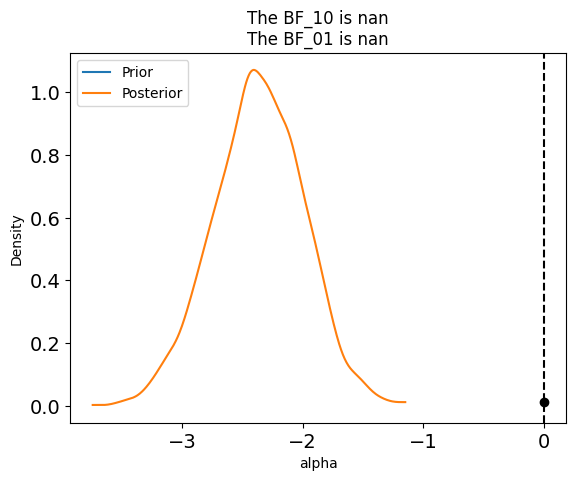

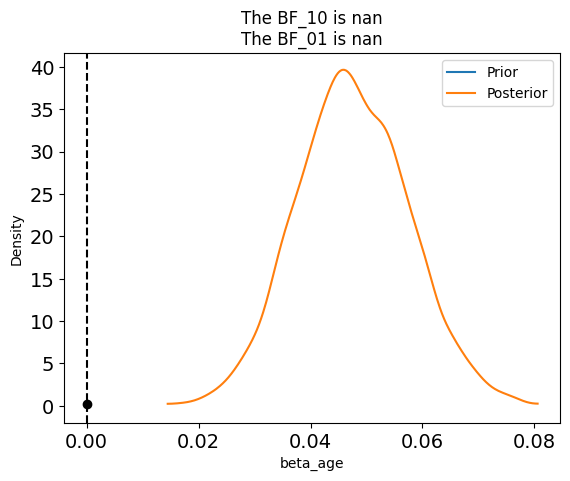

In [27]:
idata = stan_data_simu_v1

az.plot_bf(idata, var_name="alpha", ref_val=0)
az.plot_bf(idata, var_name="beta_age", ref_val=0)

plt.show()


###  alpha ~ normal(-2,1); beta_age ~ normal(0.045,1);

In [28]:
## normal distribution
## default flat prior

stan_code_v2 = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
}


parameters {

//declare parameters that will be estimated
real alpha;
real beta_age;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
alpha ~ normal(-2,1);
beta_age ~ normal(0.045,1);

p = ages * beta_age + alpha;

//likelihood
y ~ bernoulli_logit(p);
}

generated quantities {
//predictive posterior check

array[N] int y_rep;

for(n in 1:N){
y_rep[n] = bernoulli_logit_rng(ages[n] * beta_age + alpha);

}
}
"""

In [29]:
## normal distribution
## default flat prior

stan_code_prior_v2 = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
}


parameters {

//declare parameters that will be estimated
real alpha;
real beta_age;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
alpha ~ normal(-2,1);
beta_age ~ normal(0.045,1);

}
"""

In [30]:
stan_model_v2 = stan.build(stan_code_v2, data=train_data)

Building: found in cache, done.
Messages from stanc:
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_n7kw5rug/model_ukbiipjo.stan', line 5, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_n7kw5rug/model_ukbiipjo.stan', line 24, column 18: Argument
    0.045 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).


In [31]:
stan_model_prior_v2 = stan.build(stan_code_prior_v2, data=train_data)

Building: found in cache, done.
Messages from stanc:
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_5ywgcsro/model_ixav4s5c.stan', line 5, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_5ywgcsro/model_ixav4s5c.stan', line 24, column 18: Argument
    0.045 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).


In [32]:
fit_v2_prior = stan_model_prior_v2.sample(num_chains=4, num_samples=1000) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.000944 seconds
  1000 transitions using 10 leapfrog steps per transition would take 9.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000892 seconds
  1000 transitions using 10 leapfrog steps per transition would take 8.92 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000903 seconds
  1000 transitions using 10 leapfrog steps per transition would take 9.03 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000891 seconds
  1000 transitions using 10 leapfrog steps per transition would take 8.91 seconds.
  Adjust your expectations accordingly!


In [33]:
fit_v2 = stan_model_v2.sample(num_chains=4, num_samples=1000, num_warmup=500) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   2% (100/6000)
Sampling:  27% (1600/6000)
Sampling:  52% (3100/6000)
Sampling:  77% (4600/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.00174 seconds
  1000 transitions using 10 leapfrog steps per transition would take 17.4 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001657 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.57 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001659 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.59 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001665 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.65 seconds.
  Adjust your expectations accordingly!


each sample of that parameter (so the sampling method has generated 1000 values for each parameter)

In [34]:
fit_v2.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age,y_rep.1,...,y_rep.298,y_rep.299,y_rep.300,y_rep.301,y_rep.302,y_rep.303,y_rep.304,y_rep.305,y_rep.306,y_rep.307
draws,,,,,,,,,,,,,,,,,,,,,
0,-184.020323,0.992785,0.243228,3.0,15.0,0.0,184.465861,-2.205553,0.040660,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-184.131816,1.000000,0.298460,1.0,1.0,0.0,184.387265,-2.475959,0.047254,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-185.546388,1.000000,0.244275,1.0,1.0,0.0,186.276548,-2.798673,0.053531,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,-185.164404,1.000000,0.223989,2.0,5.0,0.0,187.238225,-1.845175,0.030612,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-183.837626,0.999596,0.243228,3.0,11.0,0.0,184.086680,-2.245175,0.046748,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-183.685296,0.998919,0.223989,4.0,17.0,0.0,183.785164,-2.447587,0.049366,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
3996,-185.675557,0.930795,0.243228,3.0,11.0,0.0,186.692078,-2.138612,0.048437,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3997,-185.357663,0.785996,0.298460,2.0,3.0,0.0,185.725650,-2.113657,0.035284,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
beta_age_m = fit_v2['beta_age'].mean()

In [36]:
beta_age_m

0.04654197185852921

In [37]:
summary2 = az.summary(fit_v2) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [38]:
summary2

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-2.327,0.361,-3.006,-1.683,0.014,0.010,699.0,998.0,1.0
beta_age,0.047,0.010,0.030,0.066,0.000,0.000,702.0,1119.0,1.0
y_rep[0],0.440,0.496,0.000,1.000,0.008,0.006,3976.0,3976.0,1.0
y_rep[1],0.416,0.493,0.000,1.000,0.008,0.005,4086.0,4000.0,1.0
y_rep[2],0.306,0.461,0.000,1.000,0.008,0.005,3665.0,3665.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[302],0.322,0.467,0.000,1.000,0.007,0.005,4112.0,4000.0,1.0
y_rep[303],0.262,0.440,0.000,1.000,0.007,0.005,4065.0,4000.0,1.0
y_rep[304],0.606,0.489,0.000,1.000,0.008,0.006,3878.0,3878.0,1.0
y_rep[305],0.282,0.450,0.000,1.000,0.007,0.005,3885.0,3885.0,1.0


In [39]:
stan_data_simu_v2 = az.from_pystan(
    posterior=fit_v2,
    posterior_predictive=["y_rep"],
    observed_data=["y"],
    posterior_model=stan_model_v2,
    coords={"y_rep": np.arange(train_data["N"])},
    prior = fit_v2_prior
)

In [40]:
stan_data_simu_v2

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> sample_stats_prior
	> observed_data

<Axes: xlabel='y / y_rep'>

/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


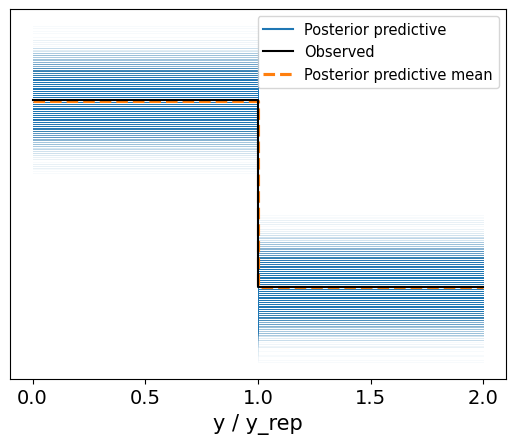

In [41]:
az.plot_ppc(stan_data_simu_v2, data_pairs={"y": "y_rep"}, alpha=0.03, textsize=14)

The reference value is outside of the posterior. This translate into infinite support for H1, which is most likely an overstatement.


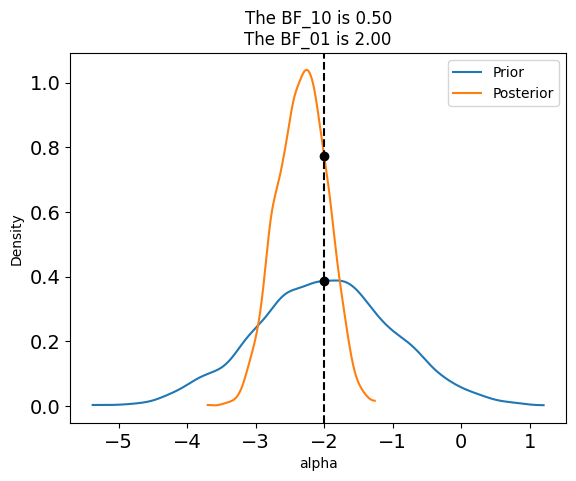

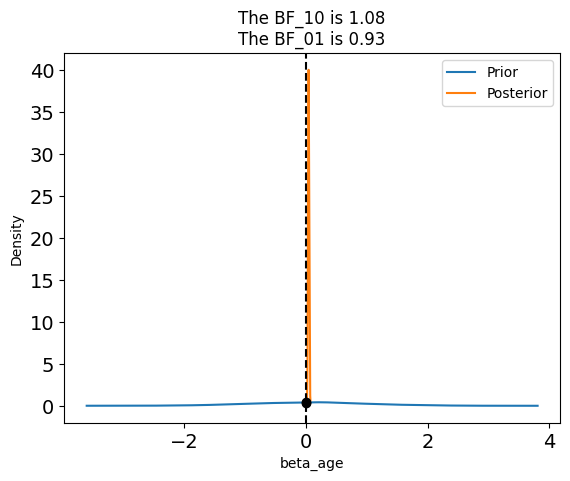

In [42]:
idata_v2 = stan_data_simu_v2

az.plot_bf(idata_v2, var_name="alpha", ref_val=-2)
az.plot_bf(idata_v2, var_name="beta_age", ref_val=0)

plt.show()


### alpha ~ normal(-2,1); beta_age ~ normal(0.045,0.008);

In [43]:
## normal distribution
## default flat prior

stan_code_v3 = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
}


parameters {

//declare parameters that will be estimated
real alpha;
real beta_age;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
alpha ~ normal(-2,1);
beta_age ~ normal(0.045,0.008);

p = ages * beta_age + alpha;

//likelihood
y ~ bernoulli_logit(p);
}

generated quantities {
//predictive posterior check

array[N] int y_rep;

for(n in 1:N){
y_rep[n] = bernoulli_logit_rng(ages[n] * beta_age + alpha);

}
}
"""

In [44]:
## prior

stan_code_prior_v3 = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
}


parameters {

//declare parameters that will be estimated
real alpha;
real beta_age;

}


model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

alpha ~ normal(-2,1);
beta_age ~ normal(0.045,0.008);
vector[N] p;
p = ages * beta_age + alpha;
}

"""

In [45]:
stan_model_v3 = stan.build(stan_code_v3, data=train_data)

Building: found in cache, done.
Messages from stanc:
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_tzo2b94_/model_lbjzhf3t.stan', line 5, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_tzo2b94_/model_lbjzhf3t.stan', line 24, column 24: Argument
    0.008 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_tzo2b94_/model_lbjzhf3t.stan', line 24, column 18: Argument
    0.045 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).


In [46]:
stan_model_prior_v3 = stan.build(stan_code_prior_v3, data=train_data)

Building: found in cache, done.
Messages from stanc:
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_68rwqrm4/model_nwkw2flz.stan', line 5, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_68rwqrm4/model_nwkw2flz.stan', line 25, column 24: Argument
    0.008 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_68rwqrm4/model_nwkw2flz.stan', line 25, column 18: Argument
    0.045 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).


In [47]:
fit_v3_prior = stan_model_prior_v3.sample(num_chains=4, num_samples=1000) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.001158 seconds
  1000 transitions using 10 leapfrog steps per transition would take 11.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001131 seconds
  1000 transitions using 10 leapfrog steps per transition would take 11.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001128 seconds
  1000 transitions using 10 leapfrog steps per transition would take 11.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001121 seconds
  1000 transitions using 10 leapfrog steps per transition would take 11.21 seconds.
  Adjust your expectations accordingly!


In [48]:
fit_v3 = stan_model_v3.sample(num_chains=4, num_samples=1000) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   4% (300/8000)
Sampling:  29% (2300/8000)
Sampling:  54% (4300/8000)
Sampling:  79% (6300/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.00192 seconds
  1000 transitions using 10 leapfrog steps per transition would take 19.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001698 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.98 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001701 seconds
  1000 transitions using 10 leapfrog steps per transition would take 17.01 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001705 seconds
  1000 transitions using 10 leapfrog steps per transition would take 17.05 seconds.
  Adjust your expectations accordingly!


In [49]:
fit_v3.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age,y_rep.1,...,y_rep.298,y_rep.299,y_rep.300,y_rep.301,y_rep.302,y_rep.303,y_rep.304,y_rep.305,y_rep.306,y_rep.307
draws,,,,,,,,,,,,,,,,,,,,,
0,-184.169018,1.000000,0.371319,2.0,3.0,0.0,184.872851,-2.031433,0.040834,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-186.530655,0.521565,0.315717,2.0,3.0,0.0,187.800838,-2.683075,0.048200,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-184.676786,0.999545,0.346138,2.0,3.0,0.0,184.769378,-2.600931,0.054424,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-184.951418,0.881309,0.396797,2.0,7.0,0.0,186.931014,-2.196493,0.048484,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-184.274229,0.950898,0.371319,1.0,3.0,0.0,184.641506,-2.059310,0.042787,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-183.805232,0.859301,0.396797,2.0,3.0,0.0,185.553575,-2.129376,0.042015,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3996,-184.085661,0.998434,0.371319,2.0,7.0,0.0,184.575817,-2.180194,0.045928,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3997,-185.373104,0.938233,0.315717,3.0,7.0,0.0,185.710836,-1.837806,0.037286,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
summary3 = az.summary(fit_v3) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [51]:
summary3

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-2.295,0.247,-2.754,-1.838,0.007,0.005,1159.0,950.0,1.00
beta_age,0.046,0.006,0.034,0.056,0.000,0.000,1158.0,1054.0,1.01
y_rep[0],0.423,0.494,0.000,1.000,0.008,0.006,3983.0,3983.0,1.00
y_rep[1],0.408,0.492,0.000,1.000,0.008,0.006,3818.0,3818.0,1.00
y_rep[2],0.310,0.463,0.000,1.000,0.007,0.005,3964.0,3964.0,1.00
...,...,...,...,...,...,...,...,...,...
y_rep[302],0.316,0.465,0.000,1.000,0.007,0.005,4067.0,4000.0,1.00
y_rep[303],0.258,0.438,0.000,1.000,0.007,0.005,3964.0,3964.0,1.00
y_rep[304],0.593,0.491,0.000,1.000,0.008,0.005,4199.0,4000.0,1.00
y_rep[305],0.287,0.452,0.000,1.000,0.007,0.005,3937.0,3937.0,1.00


In [52]:
stan_data_simu_v3 = az.from_pystan(
    posterior=fit_v3,
    posterior_predictive=["y_rep"],
    observed_data=["y"],
    posterior_model=stan_model_v3,
    coords={"y_rep": np.arange(train_data["N"])},
    prior = fit_v3_prior
)

In [53]:
stan_data_simu_v3

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> sample_stats_prior
	> observed_data

<Axes: xlabel='y / y_rep'>

/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


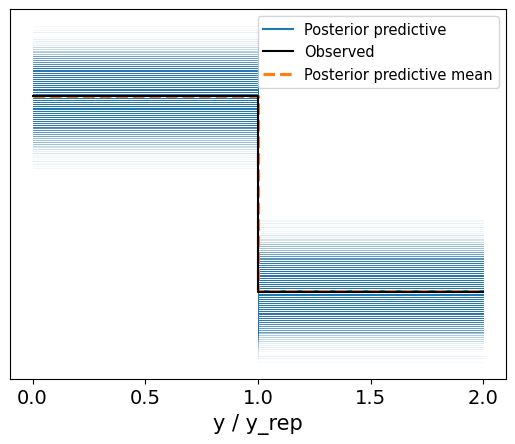

In [54]:
az.plot_ppc(stan_data_simu_v3, data_pairs={"y": "y_rep"}, alpha=0.03, textsize=14)

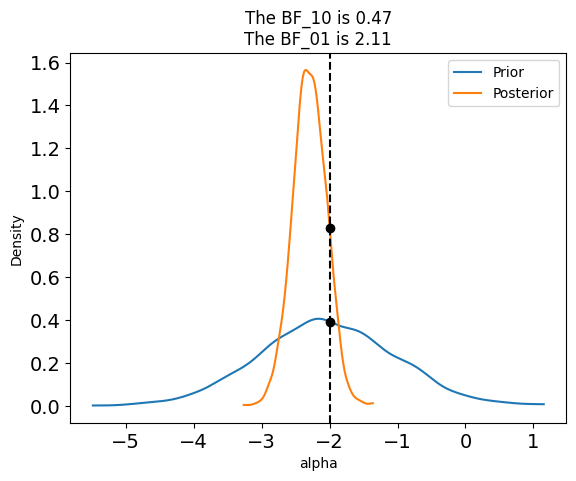

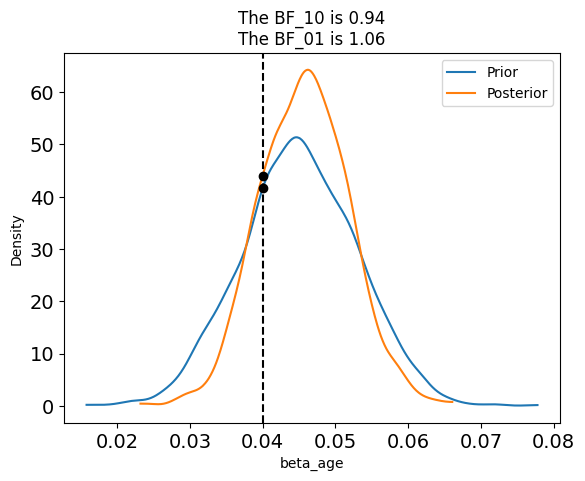

In [55]:
idata_v3 = stan_data_simu_v3

az.plot_bf(idata_v3, var_name="alpha", ref_val=-2)
az.plot_bf(idata_v3, var_name="beta_age", ref_val=0.04)

plt.show()


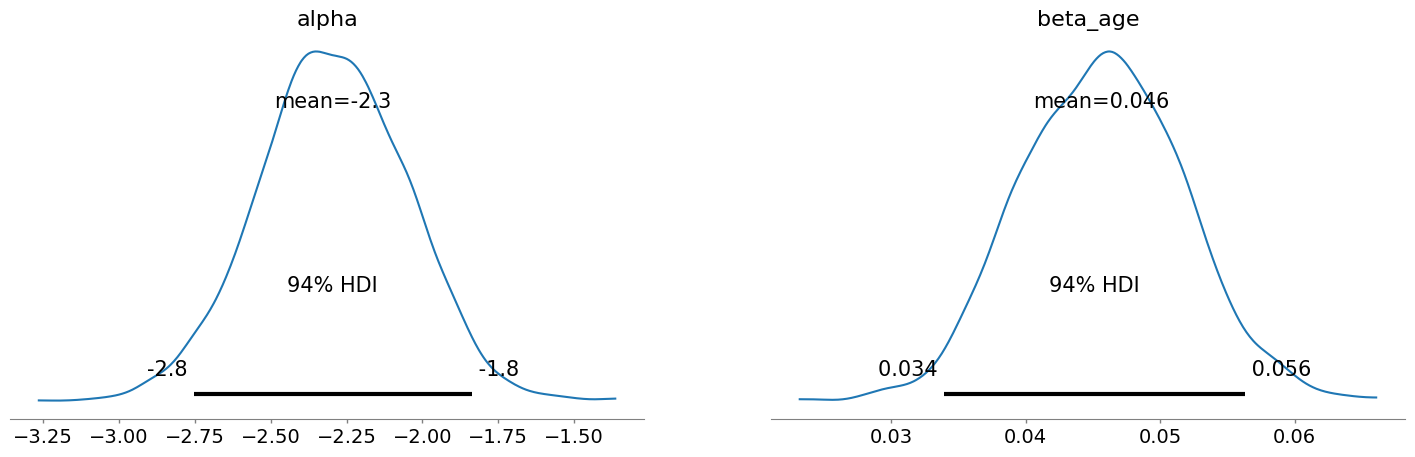

In [133]:
axes = az.plot_posterior(
    stan_data_simu_v3,
    var_names=["alpha", "beta_age"],
    figsize=(18, 5),
)

### alpha ~ normal(-2,1); beta_age ~ normal(0,0.000001);

All students had the same estimated intercept β0 ~ N (0,0.000001) and coefficient estimates (i.e., fixed effects)

In [118]:
## normal distribution
## default flat prior

stan_code_v4 = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
}


parameters {

//declare parameters that will be estimated
real alpha;
real beta_age;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
alpha ~ normal(-2,1);
beta_age ~ normal(0.45,0.0000001);

p = ages * beta_age + alpha;

//likelihood
y ~ bernoulli_logit(p);
}

generated quantities {
//predictive posterior check

array[N] int y_rep;

for(n in 1:N){
y_rep[n] = bernoulli_logit_rng(ages[n] * beta_age + alpha);

}
}
"""

In [119]:
stan_model_v4 = stan.build(stan_code_v4, data=train_data)

Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/q73fbgi3/model_q73fbgi3.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/chainable_object.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/typedefs.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-pac

Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/q73fbgi3/model_q73fbgi3.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^


Building: 3.6s
Building: 3.7s
Building: 3.9s
Building: 4.0s
Building: 4.1s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/q73fbgi3/model_q73fbgi3.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/q73fbgi3/model_q73fbgi3.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:12:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/hcubature.hpp:468:7: warning: unused variable 'kdiv' [-Wunused-variable]
  int kdiv = kdivide;
      ^


Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/q73fbgi3/model_q73fbgi3.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-

Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 7.0s
Building: 7.1s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/q73fbgi3/model_q73fbgi3.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:128:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:98:7: warning: unused variable 'n' [-Wunused-variable]
  int n = G.rows();  // number of states
      ^


Building: 7.3s
Building: 7.4s
Building: 7.5s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/q73fbgi3/model_q73fbgi3.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:210:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/multi_student_t_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan

Building: 7.6s
Building: 7.7s
Building: 7.8s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/q73fbgi3/model_q73fbgi3.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:312:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan

Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/q73fbgi3/model_q73fbgi3.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s


/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:192:12: warning: unused variable 'pre_mult' [-Wunused-variable]
      auto pre_mult = a2 * pow(1 - z, -1 - a2);
           ^
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:307:20: note: in instantiation of function template specialization 'stan::math::internal::grad_2F1_impl<true, true, true, true, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, std::tuple<stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>>>' requested here
  return internal::grad_2F1_impl<true, true, true, true>(a1, a2, b1, z,
                   ^
In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/q73fbgi3/model_q73fbgi3.cpp:2:
In file i

Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s


21 warnings generated.
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libsundials_nvecserial.a(nvector_serial.o)) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: ob

In [120]:
## prior

stan_code_prior_v4 = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
}


parameters {

//declare parameters that will be estimated
real alpha;
real beta_age;

}


model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

alpha ~ normal(-2,1);
beta_age ~ normal(0.45,0.0000001);

vector[N] p;
p = ages * beta_age + alpha;
}

"""

In [121]:
stan_model_prior_v4 = stan.build(stan_code_prior_v4, data=train_data)

Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/4ncwagao/model_4ncwagao.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/chainable_object.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/typedefs.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-pac

Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/4ncwagao/model_4ncwagao.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^


Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/4ncwagao/model_4ncwagao.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/4ncwagao/model_4ncwagao.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:12:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/hcubature.hpp:468:7: warning: unused variable 'kdiv' [-Wunused-variable]
  int kdiv = kdivide;
      ^


Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/4ncwagao/model_4ncwagao.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-

Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/4ncwagao/model_4ncwagao.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:128:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:98:7: warning: unused variable 'n' [-Wunused-variable]
  int n = G.rows();  // number of states
      ^


Building: 6.4s
Building: 6.5s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/4ncwagao/model_4ncwagao.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:210:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/multi_student_t_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan

Building: 6.6s
Building: 6.7s
Building: 6.8s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/4ncwagao/model_4ncwagao.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:312:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan

Building: 6.9s
Building: 7.0s
Building: 7.1s
Building: 7.2s
Building: 7.3s
Building: 7.4s
Building: 7.5s
Building: 7.6s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/4ncwagao/model_4ncwagao.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.2s


/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:192:12: warning: unused variable 'pre_mult' [-Wunused-variable]
      auto pre_mult = a2 * pow(1 - z, -1 - a2);
           ^
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:307:20: note: in instantiation of function template specialization 'stan::math::internal::grad_2F1_impl<true, true, true, true, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, std::tuple<stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>>>' requested here
  return internal::grad_2F1_impl<true, true, true, true>(a1, a2, b1, z,
                   ^
In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/4ncwagao/model_4ncwagao.cpp:2:
In file i

Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.7s


21 warnings generated.
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libsundials_nvecserial.a(nvector_serial.o)) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: ob

Building: 11.7s, done.
Messages from stanc:
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_iwye7zs4/model_4ncwagao.stan', line 5, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_iwye7zs4/model_4ncwagao.stan', line 25, column 23: Argument
    0.0000001 suggests there may be parameters that are not unit scale;
    consider rescaling with a multiplier (see manual section 22.12).


In [122]:
fit_v4_prior = stan_model_prior_v4.sample(num_chains=4, num_samples=1000) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Samplin

In [123]:
fit_v4 = stan_model_prior_v4.sample(num_chains=4, num_samples=1000) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Samplin

In [124]:
fit_v4.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age
draws,,,,,,,,,
0,-0.715140,0.996059,0.000029,10.0,1023.0,0.0,1.125378,-0.863038,0.45
1,-2.941120,0.981246,0.000039,10.0,1023.0,0.0,3.550442,0.425267,0.45
2,-9.151808,0.850107,0.000033,10.0,1023.0,0.0,10.432950,1.982032,0.45
3,-1.832626,0.839773,0.000031,1.0,3.0,0.0,1.864999,-0.797884,0.45
4,-0.768773,0.975007,0.000029,10.0,1023.0,0.0,1.032659,-0.863032,0.45
5,-3.791435,0.814997,0.000039,2.0,7.0,0.0,3.927691,0.425267,0.45
6,-8.445313,0.993909,0.000033,10.0,1023.0,0.0,9.468872,1.982072,0.45
7,-1.040083,0.841113,0.000031,2.0,7.0,0.0,3.137201,-0.797884,0.45
8,-0.646600,0.900978,0.000029,2.0,7.0,0.0,1.886775,-0.863032,0.45


In [125]:
summary4 = az.summary(fit_v4) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [126]:
summary4

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.186,1.157,-0.864,1.982,0.576,0.441,5.0,16.0,2.94
beta_age,0.450,0.000,0.450,0.450,0.000,0.000,3162.0,2281.0,1.00


In [127]:
stan_data_simu_v4 = az.from_pystan(
    posterior=fit_v4,
    observed_data=["y"],
    posterior_model=stan_model_v4,
    prior = fit_v4_prior
)

In [128]:
stan_data_simu_v4

Inference data with groups:
	> posterior
	> sample_stats
	> prior
	> sample_stats_prior
	> observed_data

The reference value is outside of the posterior. This translate into infinite support for H1, which is most likely an overstatement.
The reference value is outside of the posterior. This translate into infinite support for H1, which is most likely an overstatement.


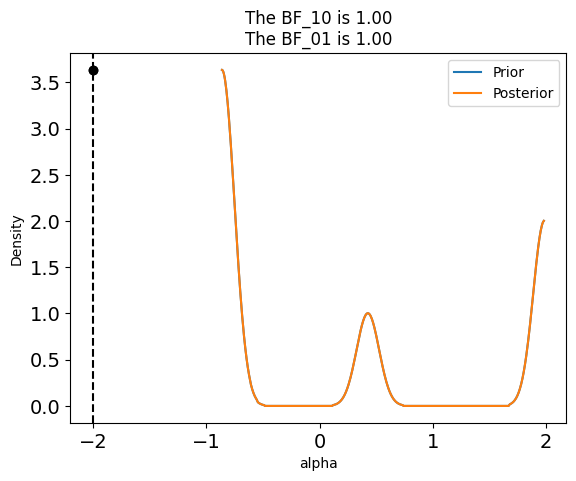

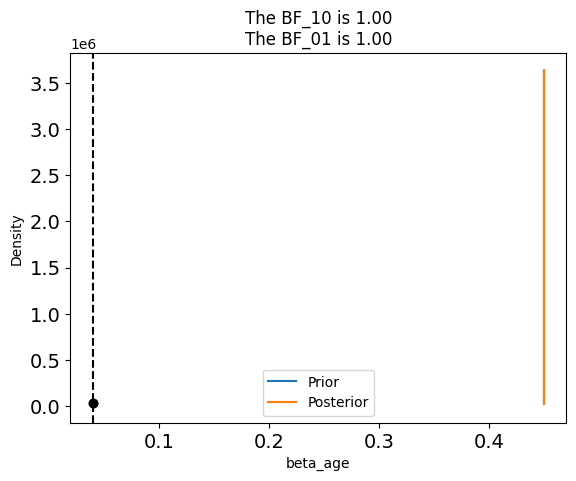

In [129]:
idata_v4 = stan_data_simu_v4

az.plot_bf(idata_v4, var_name="alpha", ref_val=-2)
az.plot_bf(idata_v4, var_name="beta_age", ref_val=0.04)

plt.show()


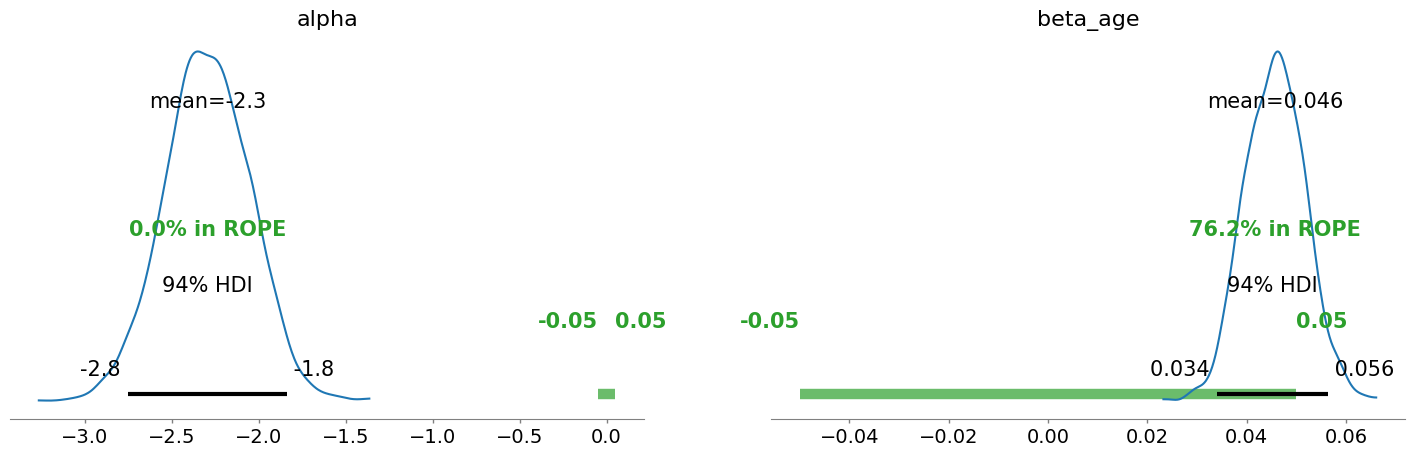

In [62]:
axes = az.plot_posterior(
    stan_data_simu_v3,
    var_names=["alpha", "beta_age"],
    rope=(-0.05, 0.05),
    figsize=(18, 5),
)

overall population: expected value: 34.14657980456026 standard deviation: 12.390813544284887


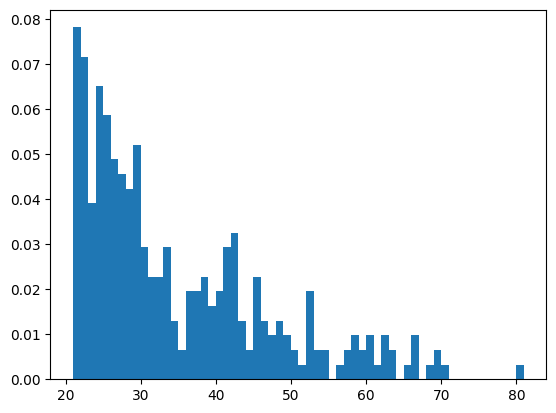

randomly selected items:
            expected value: 31.02
            standard deviation: 9.443495115686776
    


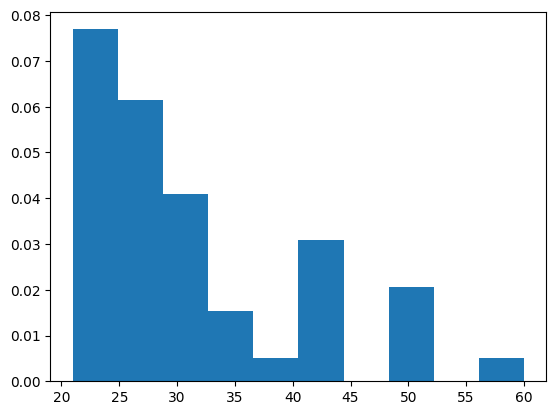

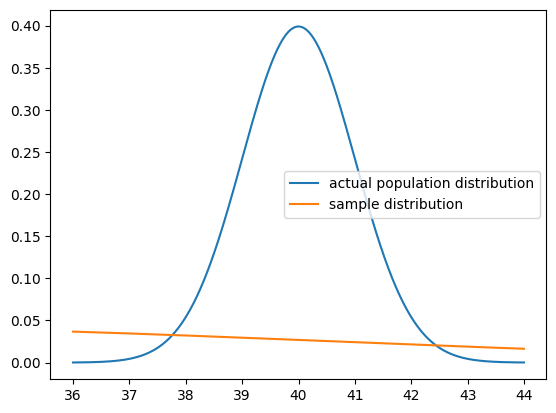

In [117]:

## method of moment

from random import choice
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

expected_value = lambda values: sum(values) / len(values)
standard_deviation = lambda values, expected_value: np.sqrt(sum([(v - expected_value)**2 for v in values])  / len(values))

population = train.loc[:, "Age"].values
mean = expected_value(population)
print('overall population: expected value: {0} standard deviation: {1}'.format(mean, standard_deviation(population, mean))
)
plt.hist(population, 60, density=True)
plt.show()

randomly_selected_items = [choice(population) for _ in range(50)]
mean = expected_value(randomly_selected_items)
s_d = standard_deviation(randomly_selected_items, mean)
print('''randomly selected items:
            expected value: {0}
            standard deviation: {1}
    '''.format(mean, s_d))
plt.hist(randomly_selected_items, 10, density=True)
plt.show()

xs = np.arange(36, 44, 0.001)
actual_ys = norm.pdf(xs, mu, sigma)
ys = norm.pdf(xs, mean, s_d)
plt.plot(xs, actual_ys, label='actual population distribution')
plt.plot(xs, ys, label='sample distribution')
plt.legend()
plt.show()

### Prediction test

In [107]:
## normal distribution
## default flat prior

stan_code_test = """

data {
int<lower=0> N; // the number of training observations
int<lower=0> N2; // the number of test observations

int<lower = 0, upper = 1> y[N];

vector[N] ages;
vector[N2] ages2; //test values
}


parameters {

//declare parameters that will be estimated
real alpha;
real beta_age;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
alpha ~ normal(-2,1);
beta_age ~ normal(0.045,0.008);

p = ages * beta_age + alpha;

//likelihood
y ~ bernoulli_logit(p);
}

generated quantities {
//predictive posterior check

array[N] int y_rep;
array[N2] int y_new;
vector[N2] beta_ages_new = ages2 * beta_age;

for(n in 1:N){
y_rep[n] = bernoulli_logit_rng(ages[n] * beta_age + alpha);
}

//test
for(n2 in 1:N2){
 y_new[n2] = bernoulli_logit_rng(beta_ages_new[n2] + alpha);
}
}
"""

In [64]:
## test

test_data = {
"N": len(train), 
"N2": len(test),
"ages": train.loc[:, "Age"].values,
"ages2": test.loc[:, "Age"].values,
 "y": train.loc[:, "Outcome"].values 
}

In [65]:
stan_model_test = stan.build(stan_code_test, data=test_data)

Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/juscbt7c/model_juscbt7c.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/chainable_object.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/typedefs.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-pac

Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/juscbt7c/model_juscbt7c.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^


Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/juscbt7c/model_juscbt7c.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/juscbt7c/model_juscbt7c.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:12:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/hcubature.hpp:468:7: warning: unused variable 'kdiv' [-Wunused-variable]
  int kdiv = kdivide;
      ^


Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/juscbt7c/model_juscbt7c.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-

Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/juscbt7c/model_juscbt7c.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:128:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:98:7: warning: unused variable 'n' [-Wunused-variable]
  int n = G.rows();  // number of states
      ^


Building: 6.1s
Building: 6.2s
Building: 6.3s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/juscbt7c/model_juscbt7c.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:210:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/multi_student_t_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan

Building: 6.4s
Building: 6.5s
Building: 6.6s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/juscbt7c/model_juscbt7c.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:312:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan

Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 7.0s
Building: 7.1s
Building: 7.2s
Building: 7.3s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/juscbt7c/model_juscbt7c.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 7.4s
Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s


/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:192:12: warning: unused variable 'pre_mult' [-Wunused-variable]
      auto pre_mult = a2 * pow(1 - z, -1 - a2);
           ^
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:307:20: note: in instantiation of function template specialization 'stan::math::internal::grad_2F1_impl<true, true, true, true, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, std::tuple<stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>>>' requested here
  return internal::grad_2F1_impl<true, true, true, true>(a1, a2, b1, z,
                   ^
In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/juscbt7c/model_juscbt7c.cpp:2:
In file i

Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s


21 warnings generated.
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libsundials_nvecserial.a(nvector_serial.o)) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: ob

In [66]:
fit_test = stan_model_test.sample(num_chains=4, num_samples=1000) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   4% (300/8000)
Sampling:  29% (2300/8000)
Sampling:  54% (4300/8000)
Sampling:  79% (6300/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.001727 seconds
  1000 transitions using 10 leapfrog steps per transition would take 17.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001767 seconds
  1000 transitions using 10 leapfrog steps per transition would take 17.67 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001692 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.92 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001677 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.77 seconds.
  Adjust your expectations accordingly!


In [67]:
fit_test.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age,y_rep.1,...,beta_ages_new.452,beta_ages_new.453,beta_ages_new.454,beta_ages_new.455,beta_ages_new.456,beta_ages_new.457,beta_ages_new.458,beta_ages_new.459,beta_ages_new.460,beta_ages_new.461
draws,,,,,,,,,,,,,,,,,,,,,
0,-184.169018,1.000000,0.371319,2.0,3.0,0.0,184.872851,-2.031433,0.040834,1.0,...,1.388352,1.388352,1.020847,0.857512,0.898346,0.898346,2.286698,0.857512,1.184183,2.409200
1,-186.530655,0.521565,0.315717,2.0,3.0,0.0,187.800838,-2.683075,0.048200,1.0,...,1.638806,1.638806,1.205005,1.012204,1.060404,1.060404,2.699211,1.012204,1.397805,2.843811
2,-184.676786,0.999545,0.346138,2.0,3.0,0.0,184.769378,-2.600931,0.054424,0.0,...,1.850418,1.850418,1.360602,1.142905,1.197330,1.197330,3.047748,1.142905,1.578298,3.211020
3,-184.951418,0.881309,0.396797,2.0,7.0,0.0,186.931014,-2.196493,0.048484,1.0,...,1.648458,1.648458,1.212102,1.018165,1.066649,1.066649,2.715108,1.018165,1.406038,2.860560
4,-185.214669,0.511184,0.371319,2.0,3.0,0.0,189.157610,-2.004962,0.035216,1.0,...,1.197344,1.197344,0.880400,0.739536,0.774752,0.774752,1.972096,0.739536,1.021264,2.077744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-186.190523,1.000000,0.396797,2.0,3.0,0.0,187.496785,-1.804984,0.031611,0.0,...,1.074771,1.074771,0.790273,0.663829,0.695440,0.695440,1.770212,0.663829,0.916717,1.865045
3996,-185.326043,0.961974,0.371319,2.0,3.0,0.0,185.386856,-2.722764,0.052863,1.0,...,1.797341,1.797341,1.321574,1.110122,1.162985,1.162985,2.960326,1.110122,1.533026,3.118915
3997,-184.446758,0.973844,0.315717,2.0,3.0,0.0,184.541929,-2.545926,0.048645,0.0,...,1.653934,1.653934,1.216128,1.021547,1.070192,1.070192,2.724126,1.021547,1.410708,2.870061


In [68]:
summary_test = az.summary(fit_test) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [69]:
summary_test

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-2.305,0.242,-2.740,-1.850,0.007,0.005,1056.0,1154.0,1.01
beta_age,0.046,0.006,0.035,0.058,0.000,0.000,1113.0,1271.0,1.01
y_rep[0],0.427,0.495,0.000,1.000,0.008,0.006,3668.0,3668.0,1.00
y_rep[1],0.414,0.493,0.000,1.000,0.008,0.006,3988.0,3988.0,1.00
y_rep[2],0.292,0.455,0.000,1.000,0.007,0.005,3989.0,3989.0,1.00
...,...,...,...,...,...,...,...,...,...
beta_ages_new[456],1.008,0.131,0.776,1.271,0.004,0.003,1113.0,1271.0,1.01
beta_ages_new[457],2.565,0.335,1.975,3.234,0.010,0.007,1113.0,1271.0,1.01
beta_ages_new[458],0.962,0.126,0.741,1.213,0.004,0.003,1113.0,1271.0,1.01
beta_ages_new[459],1.328,0.173,1.023,1.675,0.005,0.004,1113.0,1271.0,1.01


In [70]:
y_pred = fit_test['y_new']

In [71]:
y_pred = scipy.stats.mode(y_pred, axis=1).mode.ravel()

In [72]:
print(classification_report(test.loc[:, "Outcome"].values, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76       295
           1       0.42      0.11      0.17       166

    accuracy                           0.62       461
   macro avg       0.53      0.51      0.46       461
weighted avg       0.56      0.62      0.55       461



In [73]:
print(df['Outcome'].value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [137]:
# Example usage
log_odds_value = summary3['mean']['beta_age']
probability = log_odds_to_probability(log_odds_value)
print(f"The probability corresponding to a log-odds value of {log_odds_value} is {probability}")


The probability corresponding to a log-odds value of 0.046 is 0.5114979725956643


https://seansaito.github.io/2021/05/27/pystan-football/

## Useful Functions

In [136]:
import math

def log_odds_to_probability(log_odds):
    probability = 1 / (1 + math.exp(-log_odds))
    return probability


In [74]:
## diagnostic test with treedepth 

def check_treedepth(summary, max_treedepth = 10, quiet=False):
    """Check transitions that ended prematurely due to maximum tree depth limit"""
    # sampler_params = fit.get_sampler_params(inc_warmup=False)
    sampler_params = summary.sample_stats['tree_depth'].values
    depths = [x for y in sampler_params for x in y]
    n = sum(1 for x in depths if x == max_treedepth)
    N = len(depths)

    if not quiet:
        print(('{} of {} iterations saturated the maximum tree depth of {}'
              + ' ({}%)').format(n, N, max_treedepth, 100 * n / N))
    if n > 0:
        if not quiet:
            print('  Run again with max_treedepth set to a larger value to avoid saturation')
        else:
            return False
    else:
        if quiet:
            return True

## diagnostic test with divergence

def check_div(summary, quiet=False):
    """Check transitions that ended with a divergence"""
    sampler_params = summary.sample_stats['diverging'].values
    divergent = [x for y in sampler_params for x in y]
    # n = sum(divergent)
    divergent = [True if element == "True" else False for element in divergent]
    n = divergent.count(True)
    N = len(divergent)
    if not quiet:
        print('{} of {} iterations ended with a divergence ({}%)'.format(n, N,
            100 * n / N))

    if n > 0:
        if not quiet:
            print('  Try running with larger adapt_delta to remove the divergences')
        else:
            return False
    else:
        if quiet:
            return True

In [75]:
## Diagnostic test
check_treedepth(stan_data_simu_v3)
check_div(stan_data_simu_v3)

0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
0 of 4000 iterations ended with a divergence (0.0%)


In [76]:
## set dataframe display infinite
pd.set_option('display.max_rows', None)  # or 1000

In [77]:
# import the relevant modules
import shutil
import httpstan.models
import httpstan.cache

In [78]:
httpstan.cache.list_model_names()

['models/3xwvhbun',
 'models/ixav4s5c',
 'models/rfye77no',
 'models/ic5l3ldu',
 'models/lbjzhf3t',
 'models/omj5slph',
 'models/ukbiipjo',
 'models/jv6p5uvs',
 'models/w6n2z5tm',
 'models/rejlpqqq',
 'models/332qyzcb',
 'models/nwkw2flz',
 'models/5mueq7op',
 'models/juscbt7c',
 'models/dofpq7vc']

In [79]:
httpstan.cache.delete_model_directory('models/dofpq7vc') ## add the model pointer you want to remove